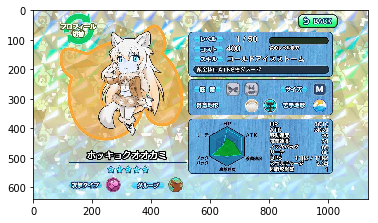

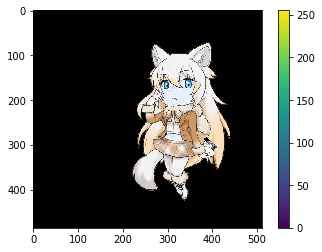

(<matplotlib.image.AxesImage at 0x29c257699b0>,
 None)

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fname = '20151225174718cRVL4Dkz.jpg'
img = cv2.imread(fname)

plt.imshow(img),plt.show()

mask_rect = (280, 120, 80, 80) # 顔領域
x1, y1 = mask_rect[0], mask_rect[1]
x2, y2 = x1 + mask_rect[2], y1 + mask_rect[3]

rect = (210, 50, 230, 400)
def img_clip(img):
    h, w, c = img.shape
    x0 = int(w * 0.45)
    y0 = int(h * 0.76)
    clip = img[0:y0, 0:x0, :]
    return clip

cimg = img_clip(img)
mask = np.zeros(cimg.shape[:2], np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)

cv2.grabCut(cimg, mask, rect, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT) # この時点でmaskに0~2の値(背景、前景、曖昧)が指定される
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8) # 前景以外の値はゼロクリア

cv2.rectangle(mask2, (x1, y1), (x2, y2), 1, -1) # 顔領域を1で塗りつぶす
cv2.grabCut(cimg, mask2, None, bgModel, fgModel, 5, cv2.GC_INIT_WITH_MASK) # マスク情報に基づいたGrabCutを適用
mask = np.where((mask2 == 2) | (mask2 == 0), 0, 1).astype(np.uint8)

out = cimg * mask[:, :, np.newaxis]

plt.imshow(out),plt.colorbar(),plt.show()

# 元の画像

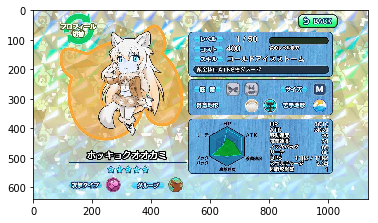

(<matplotlib.image.AxesImage at 0x29c2580b6d8>, None)

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fname = '20151225174718cRVL4Dkz.jpg'
img = cv2.imread(fname)

plt.imshow(img),plt.show()

# GrabCut 適用

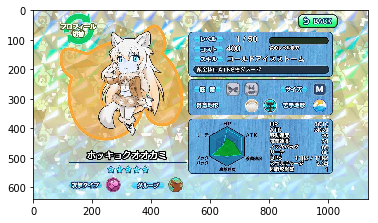

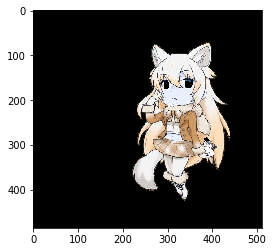

(<matplotlib.image.AxesImage at 0x209404e66d8>, None)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

fname = '20151225174718cRVL4Dkz.jpg'
img = cv2.imread(fname)

mask_rect = (280, 120, 80, 80) # 顔領域
x1, y1 = mask_rect[0], mask_rect[1]
x2, y2 = x1 + mask_rect[2], y1 + mask_rect[3]

rect = (210, 50, 230, 400)
def img_clip(img):
    h, w, c = img.shape
    x0 = int(w * 0.45)
    y0 = int(h * 0.76)
    clip = img[0:y0, 0:x0, :]
    return clip

cimg = img_clip(img)
mask = np.zeros(cimg.shape[:2], np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)

cv2.grabCut(cimg, mask, rect, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT) # この時点でmaskに0~2の値(背景、前景、曖昧)が指定される
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8) # 前景以外の値はゼロクリア

out = cimg * mask2[:, :, np.newaxis]

# cv2.rectangle(mask2, (x1, y1), (x2, y2), 1, -1) # 顔領域を1で塗りつぶす
# cv2.grabCut(cimg, mask2, None, bgModel, fgModel, 5, cv2.GC_INIT_WITH_MASK) # マスク情報に基づいたGrabCutを適用
# mask = np.where((mask2 == 2) | (mask2 == 0), 0, 1).astype(np.uint8)

# out = cimg * mask[:, :, np.newaxis]

plt.imshow(img),plt.show()
plt.imshow(out),plt.show()

背景と共に目の部分も切り取られている。  
今回対象にした画像は、背景がホログラム風のパターンをしているため、目のハイライトと傾向が似ているのが原因と考えらる。

- 方法１：GrabCut した画像で輪郭抽出を使ってmask画像を作成する。  
  GrabCut が１回不要となるので処理コストの節約が期待できる。

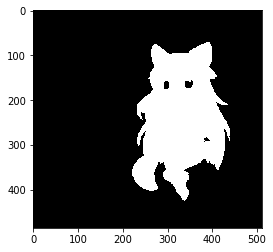

(<matplotlib.image.AxesImage at 0x20944293fd0>, None)

In [35]:
# binarize image
gray = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY) # 2値化閾値処理
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_GRAY2RGB)), plt.show()

輪郭抽出するために二値化画像を作成する。（この時点ではGrabCut時と同じで目の部分が切り取られている）

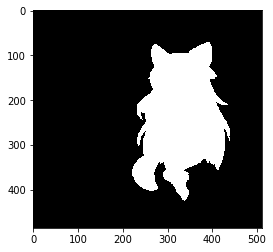

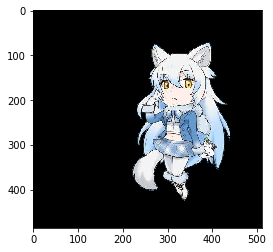

(<matplotlib.image.AxesImage at 0x20942d54128>, None)

In [38]:
# Find Contours
_, contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours.sort(key=cv2.contourArea, reverse=True) # 輪郭面積が一番大きい順に並び替える

# 輪郭の内側を塗りつぶす
mask1 = np.zeros(cimg.shape[:2], np.uint8)
cv2.drawContours(mask1, contours, -1, 255, -1)

plt.imshow(cv2.cvtColor(mask1, cv2.COLOR_GRAY2RGB)), plt.show()

# 前景以外の値はゼロクリア
mask1 = np.where((mask1 == 0), 0, 1).astype(np.uint8) 
out1 = cimg * mask1[:, :, np.newaxis] 

plt.imshow(cv2.cvtColor(out1, cv2.COLOR_BGR2RGB)), plt.show()